# Using C3PY

C3PY provides a set of check functions to check if the provided history is causally consistent given the sequential specification.

In [16]:
from pprint import pprint

from c3py import (
    History,
    Operation,
    RWMemorySpecification,
    check_CC,
    check_CCv,
    check_CM,
)
from helper import view_pydot


If Jupyter notebook cannot find the module, please make sure that the Kernel is using the correct Python environment created by rye.

## Sequential Specification

The consistency of the history is checked against the sequential specification. The sequential specification defines the set of all possible sequential histories.

To define a sequential specification, implement the `Specification` abstract class and implement the `start` and `step` methods. The `start` method should return the initial state of the sequential specification. The `step` method should take the current state and the `Instruction`, which describes the operation performed on the abstract data type, and return the next state.

The `Instruction` class has `method` and `args` fields. These fields describe the operation performed on the abstract data type.

The library provides `RWMemorySpecification` that serves as a sequential specification for a read-write memory.

## History

A history is a partially ordered set of operations. Each operation is represented by an `Operation` object. `Operation` is like `Instruction` but has an additional `ret` field that represents the return value of the operation.

To define a history, initialize a `History` object with a dictionary of list of `Operation`s. The dictionary key is the process id and the list of `Operation`s is the operations performed by the process.

For example, the following code creates a history with two processes. The first process (with id `a`) performs three write operations and the second process (with id `b`) performs one write operation and three read operations.

In [17]:
h = History(
    {
        "a": [
            Operation("wr", ("z", 1)),
            Operation("wr", ("x", 1)),
            Operation("wr", ("y", 1)),
        ],
        "b": [
            Operation("wr", ("x", 2)),
            Operation("rd", "z", None),
            Operation("rd", "y", 1),
            Operation("rd", "x", 2),
        ],
    }
)

### Causal Consistency (CC)

The library can check against three types of causal consistency: `CC`, `CM`, and `CCv`.

`check_CC` checks if the history is CC. It returns `CCResult`, which has the `is_CC` field that is `True` if the history is CC and `False` otherwise. If the history is CC, the `co` and `serializations` fields are also provided. `co` is the causal order of the history that satisfies the CC condition. `serialization` is a dictionary that maps the operation id to the serialization order.

In [18]:
cc = check_CC(h, RWMemorySpecification())
print(cc.is_CC)

True


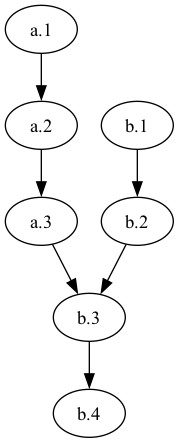

{'a.1': ['a.1'],
 'a.2': ['a.1', 'a.2'],
 'a.3': ['a.1', 'a.2', 'a.3'],
 'b.1': ['b.1'],
 'b.2': ['b.1', 'b.2'],
 'b.3': ['b.1', 'b.2', 'a.1', 'a.2', 'a.3', 'b.3'],
 'b.4': ['a.1', 'a.2', 'a.3', 'b.1', 'b.2', 'b.3', 'b.4']}


In [19]:
view_pydot(cc.co.visualize())
pprint(cc.serializations)

## Causal Memory (CM)

`check_CM` checks if the history is CM. It returns `CMResult`, which has the `is_CM` field that is `True` if the history is CM and `False` otherwise. If the history is CM, the `co` and `serializations` fields are also provided. `co` is the causal order of the history that satisfies the CM condition. `serialization` is a dictionary that maps the operation id to the serialization order.

In [20]:
cm = check_CM(h, RWMemorySpecification())
print(cm.is_CM)

False


## Causal Convergence (CCv)

`check_CCv` checks if the history is CCv. It returns `CCvResult`, which has the `is_CCv` field that is `True` if the history is CCv and `False` otherwise. If the history is CCv, the `co` and `arb` fields are also provided. `co` is the causal order of the history and `arb` is an arbitration order that satisfies the CCv condition.

In [22]:
cv = check_CCv(h, RWMemorySpecification())
print(cv.is_CCv)

True


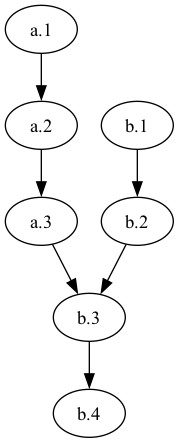

['a.1', 'a.2', 'a.3', 'b.1', 'b.2', 'b.3', 'b.4']


In [23]:
view_pydot(cv.co.visualize())
pprint(cv.arb)